# Assignment 4
### Do three of four.

### Exercise 1: Contingent Comparisons
- Load the Minnesota use of force data.
- Bootstrap the proportion of missing values for `subject_injury` for each race, and plot the results with grouped KDE and ECDF plots
- Describe what you see. When we consider second order uncertainty, how similar or different are the sampling distributions of these proportions? 

In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/mn_police_use_of_force.csv')
df.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [73]:
df['inj_na'] = df['subject_injury'].isna()

pd.crosstab( df['inj_na'],df['race'],normalize='columns')

race,Asian,Black,Native American,Other / Mixed Race,Pacific Islander,White
inj_na,,,,,,
False,0.364341,0.240847,0.280612,0.590244,0.0,0.246405
True,0.635659,0.759153,0.719388,0.409756,1.0,0.753595


In [74]:
S = 2500
results = []
for s in range(S):
    df_s = df.sample(frac=1.0,replace=True) # Resample population
    result_s = df_s.loc[:,['inj_na','race'] ].groupby('race').mean() # Compute missing proportions
    results.append( result_s )

est = pd.concat([row for row in results],axis=1).T # Turn simulation results into a dataframe

<Axes: ylabel='Proportion'>

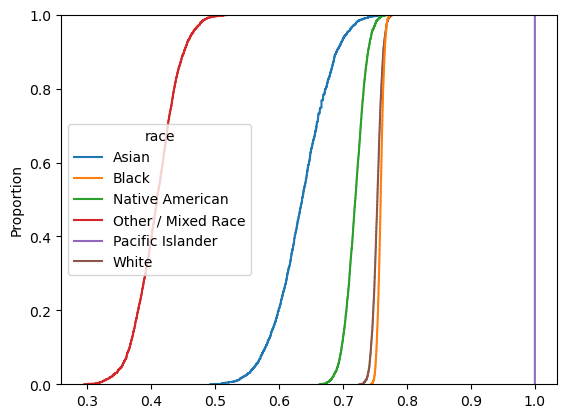

In [75]:
sns.ecdfplot(est)


/tmp/ipykernel_43948/1531245670.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(est)


<Axes: ylabel='Density'>

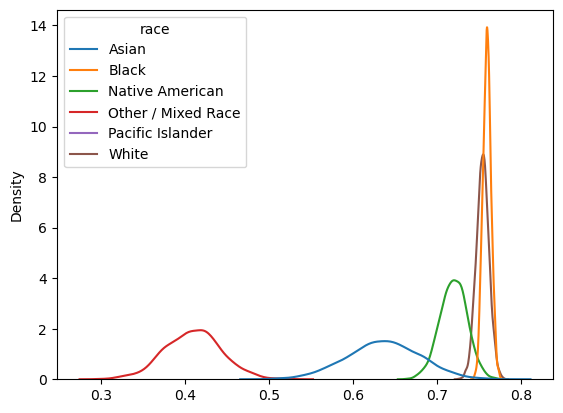

In [76]:

sns.kdeplot(est)

### Exercise 2: Invitation to Inference
- Run the simulation code line by line and comment what each line is doing, or write your own code to do the resampling
- Open the NHANES or Ames prices or College Completion data. Pick a variable and a statistic to compute (e.g. mean, median, variance, IQR)
- Use the `simulate` function from class to get a sample of estimates for your statistic and your data
- Create a new function, `interval(L,H,estimates)`, that computes the $L$-th and $H$-th quantiles for your estimates, $H>L$
- If $L=.05$ and $H=.95$, this is a **90-percent confidence interval**: "For our statistic, this interval captures the true value of the population parameter 90 percent of the time. (We are 90% **confident** that it includes the true value of the parameter, but the probability that the true parameter lies in this interval is 0 or 1.)"
- We will spend much more time on this later in class, but for people who have done hypothesis testing before, you now know how to do it directly from the data: No central limit theorem required.

In [77]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/nhanes_data_17_18.csv',low_memory=False)
print(df.columns.to_list())

var = 'TotalFatGm_DR1TOT'

S = 2500
results = []
for s in range(S):
    df_s = df.sample(frac=1.0,replace=True) # Resample population
    result_s = df_s[var].median() # Compute missing proportions
    results.append( result_s )
estimates = np.array(results)

['SEQN', 'GeneralHealthCondition', 'EverBreastfedOrFedBreastmilk', 'AgeStoppedBreastfeedingdays', 'AgeFirstFedFormuladays', 'AgeStoppedReceivingFormuladays', 'AgeStartedOtherFoodbeverage', 'AgeFirstFedMilkdays', 'TypeOfMilkFirstFedWholeMilk', 'TypeOfMilkFirstFed2Milk', 'TypeOfMilkFirstFed1Milk', 'TypeOfMilkFirstFedFatFreeMilk', 'TypeOfMilkFirstFedSoyMilk', 'TypeOfMilkFirstFedOther', 'HowHealthyIsTheDiet', 'Past30DayMilkProductConsumption', 'YouDrinkWholeOrRegularMilk', 'YouDrink2FatMilk', 'YouDrink1FatMilk', 'YouDrinkFatFreeskimMilk', 'YouDrinkSoyMilk', 'YouDrinkAnotherTypeOfMilk', 'RegularMilkUse5TimesPerWeek', 'HowOftenDrankMilkAge512', 'HowOftenDrankMilkAge1317', 'HowOftenDrankMilkAge1835', 'CommunitygovernmentMealsDelivered', 'EatMealsAtCommunityseniorCenter', 'AttendKindergartenThruHighSchool', 'SchoolServesSchoolLunches', 'OfTimesweekGetSchoolLunch', 'SchoolLunchFreeReducedOrFullPrice', 'SchoolServeCompleteBreakfastEachDay', 'OfTimesweekGetSchoolBreakfast', 'SchoolBreakfastFreere

In [86]:
def interval(L,H,estimates,plot=True):
    qL = np.quantile(estimates,L)
    qH = np.quantile(estimates,H)
    
    if plot:
        sns.kdeplot(estimates)
        plt.axvline(x=qL,color='orange',linestyle='--')
        plt.axvline(x=qH,color='orange',linestyle='--')
        print(f'Interval lower bound: {qL} \nInterval upper bound: {qH}')
    return qL, qH

Interval lower bound: 70.755 
Interval upper bound: 72.53999999999998


(70.755, 72.53999999999998)

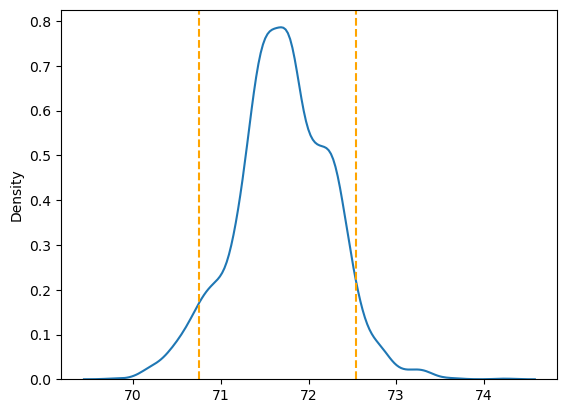

In [87]:
interval(.05,.95,estimates)

### Exercise 3: Intro to A/B Testing
- Go here, and read about this study: https://www.clinicaltrials.gov/study/NCT01985360
- Read the Study Overview and explain what the goal of the trial is 
- Read the Study Plan and explain how it was designed and why -- there's lots of medical jargon, but the main point is how patients were assigned to interventions. 
- Read the Results Posted: Go to **Outcome Measures**. Explain how table 1 ("Incidence of Death from Any Cause or Myocardial Infarction") is a contingency table. These are the data for this exercise.
- What is the difference in surival rates between the invasive strategy and the conservative strategy?
- Bootstrap the survival rates for the two groups, and plot them as KDEs and ECDFs against one another
- Bootstrap the difference in surival rates, and plot it as a KDE and ECDF
- Is this an effective health intervention? Explain your answer clearly

This would be what CS people call **A/B testing** and everyone else called a **randomized controlled trial**: Using randomized assignment to detect the difference in outcomes between two groups. (We've just done a non-parametric version of a two-sample t-test.)

In [81]:
n_con = 389
y_con = np.ones(n_con)
y_con[:129] = 0
df_con = pd.DataFrame({'arm':'conservative','outcome':y_con})

n_inv = 388
y_inv = np.ones(n_inv)
y_inv[:123] = 0
df_inv = pd.DataFrame({'arm':'invasive','outcome':y_inv})


In [82]:

est_con = []
est_inv = []
est_diff =[]
for s in range(2000):
    df_con_s = df_con.sample(frac=1.0,replace=True)
    df_inv_s = df_inv.sample(frac=1.0,replace=True)    

    est_con.append( df_con_s['outcome'].mean() )
    est_inv.append( df_inv_s['outcome'].mean() )
    est_diff.append( df_con_s['outcome'].mean()-df_inv_s['outcome'].mean() )

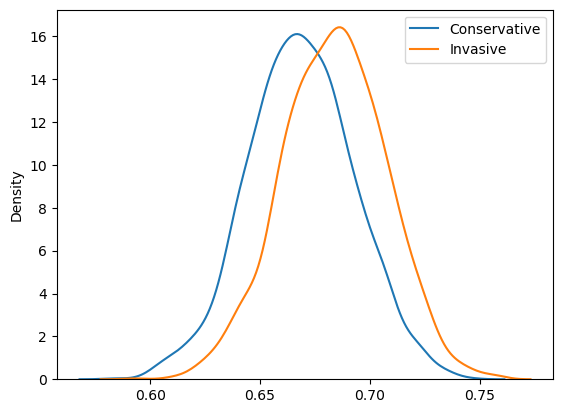

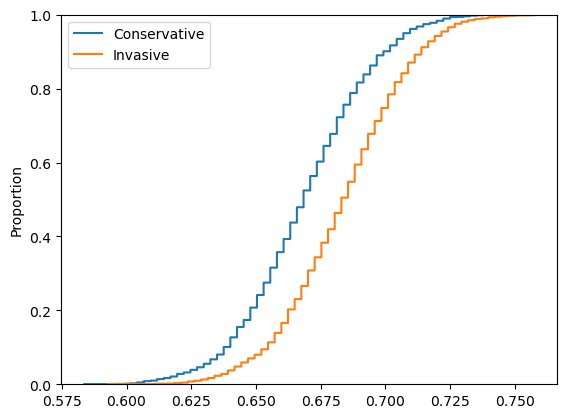

In [83]:
sns.kdeplot(est_con, label = 'Conservative')
sns.kdeplot(est_inv, label = 'Invasive')
plt.legend()
plt.show()

sns.ecdfplot(est_con, label = 'Conservative')
sns.ecdfplot(est_inv, label = 'Invasive')
plt.legend()
plt.show()


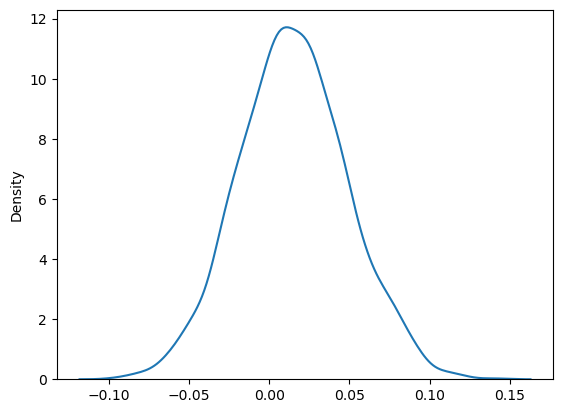

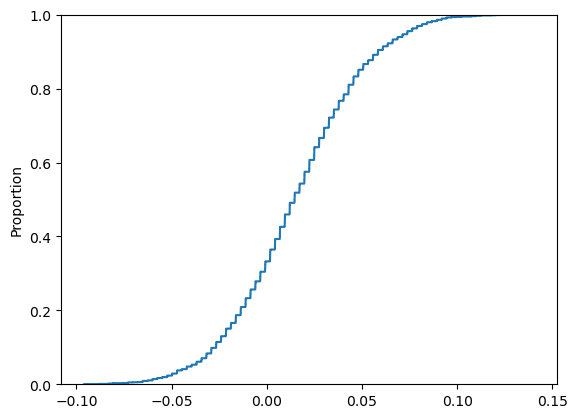

In [80]:

sns.kdeplot(est_diff)
plt.show()

sns.ecdfplot(est_diff)
plt.show()

### Exercise 4: Prediction Uncertainty
- Pick a dataset and two continuous variables.
- Recall the LCLS estimator:
$$
\hat{y}(z) =  \frac{ \frac{1}{N} \sum_{i=1}^N y_i \times \frac{1}{h}k\left( \frac{z - x_i}{h} \right)}{ \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k\left( \frac{z - x_i}{h} \right)}
$$
with the Epanechnikov kernel and the standard plug-in bandwidth for $h$
- Compute and plot this line for 30 bootstrap samples. Notice where there is a lot of variation in the predictions, versus little variation in the predictions.
- Now, for any $z$, we can bootstrap a distribution of predictions using the above formula. Do this at the 25th percentile, median, and 75th percentile of $X$, and make KDE plots of your results.
- Now, pick a grid for $z$: Obvious choices are all of the unique values in the data, or an equally spaced grid from the minimum value to the maximum value. For each $z$, bootstrap a sample of predictions and compute the .05 and .95 quantiles. Plot these error curves along with your LCLS estimate. Where are your predictions "tight"/reliable? Where are they highly variable/unreliable?

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('./data/ames_prices.csv')

df.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


<Axes: xlabel='area', ylabel='price'>

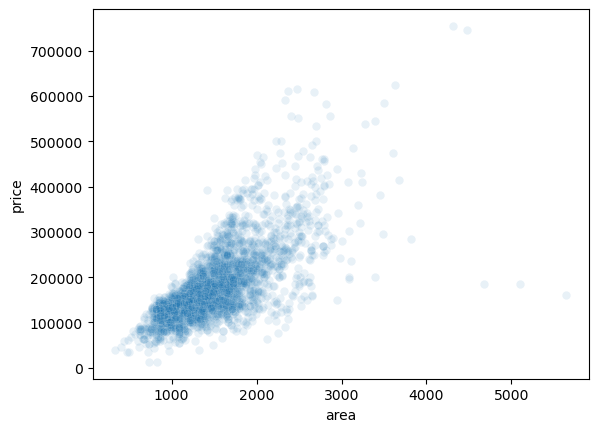

In [63]:
df = df.loc[:,['price','area'] ]
df = df.dropna()
df = df.reset_index()

x = df['area']
y = df['price']

sns.scatterplot(x=x,y=y,alpha=.1)

In [21]:
class lcls:
    ''' Local constant least squares estimator class.'''

    def __init__(self):
        self.h = None
        self.kernel = None
        self.n = None
        self.x = None
        self.y = None
        self.density_x = None
        self.y_hat = None
        self.grid = None
        self.y_hat_z = None

    def kernel_function(self, u):
        ''' Kernel options for lcls.'''
        if self.kernel == 'gaussian':
            return np.exp(-0.5 * u**2) / np.sqrt(2 * np.pi)
        elif self.kernel == 'uniform':
            return 0.5 * (np.abs(u) <= 1)
        elif self.kernel == 'triangular':
            return (1 - np.abs(u)) * (np.abs(u) <= 1)
        elif self.kernel == 'epanechnikov':
            return .75 * (1-u**2) * (np.abs(u) <= 1)
        else:
            print("Unsupported kernel.")

    def fit(self, x, y, h = None, kernel_type = None):
        '''Fit the LCLS estimator; automatically selects Silverman bandwidth.'''
        self.x = np.asarray(x)
        self.y = np.asarray(y)
        self.n = len(self.x)

        if kernel_type is None:
            self.kernel = 'gaussian'
        else:
            self.kernel = kernel_type

        if h is None:
            self.h = 1.06 * np.sqrt( np.var(self.x) ) * self.n**(-0.2)
        else:
            self.h = h

        self.grid = np.sort( np.unique(self.x) )

        # Compute KDE
        diff_mat = (self.grid.reshape(1, -1) - self.x.reshape(-1, 1)) / self.h
        kernel_vals = self.kernel_function(diff_mat)/self.h
        self.density = np.mean(kernel_vals, axis=0) 

        # Compute LCLS
        den = self.density 
        num = self.y @ kernel_vals/self.n # Use matrix multiplication
        self.y_hat = num/den

    def predict(self, z):
        '''Predict values for z.'''

        # Compute KDE
        diff_mat = (z.reshape(1, -1) - self.x.reshape(-1, 1)) / self.h
        kernel_vals = self.kernel_function(diff_mat)/self.h
        density = np.mean(kernel_vals, axis=0) 

        # Compute LCLS
        den = density 
        num = self.y @ kernel_vals/self.n # Use matrix multiplication
        self.y_hat_z = num/den

    def plot(self):
        '''Plot LCLS estimator.'''
        sns.scatterplot(x=self.x, y=self.y, alpha=.05)
        plt.plot(self.grid, self.y_hat, color='orange')
        plt.title(f"LCLS with {self.kernel} kernel, h={self.h:.4f}")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()

    def __repr__(self):
        self.plot()
        return (f"LCLS Summary:\n"
                f"Kernel: {self.kernel}\n"
                f"Bandwidth: {self.h:.4f}\n")

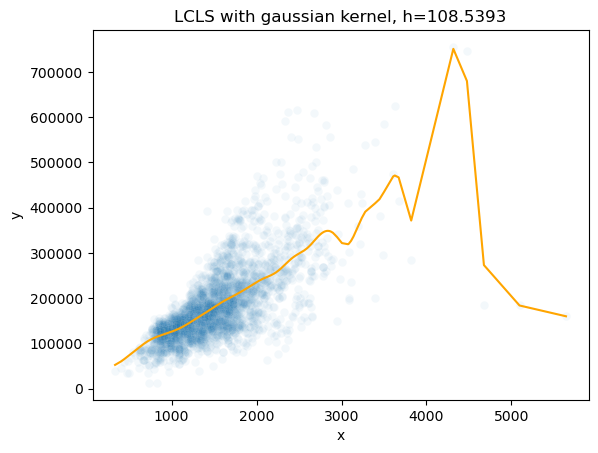

LCLS Summary:
Kernel: gaussian
Bandwidth: 108.5393

In [64]:
reg = lcls()
reg.fit(x=x,y=y)
reg

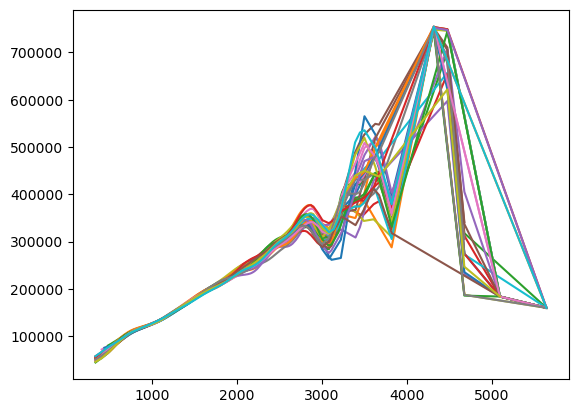

In [23]:
for k in range(30):
    df_k = df.sample(frac=1.0,replace=True)
    reg.fit(x=df_k['area'],y=df_k['price'])
    sns.lineplot(x=reg.grid,y=reg.y_hat )


In [28]:
x25 = np.quantile(x,.25)
x50 = np.quantile(x,.5)
x75 = np.quantile(x,.75)

est25 = []
est50 = []
est75 = []
for s in range(2000):
    df_s = df.sample(frac=1.0,replace=True)
    reg_s = lcls()
    reg_s.fit(x=df_s['area'],y=df_s['price'])
    
    reg_s.predict(x25)
    est25.extend( reg_s.y_hat_z )
    reg_s.predict(x50)
    est50.extend( reg_s.y_hat_z )
    reg_s.predict(x75)
    est75.extend( reg_s.y_hat_z )


<Axes: ylabel='Density'>

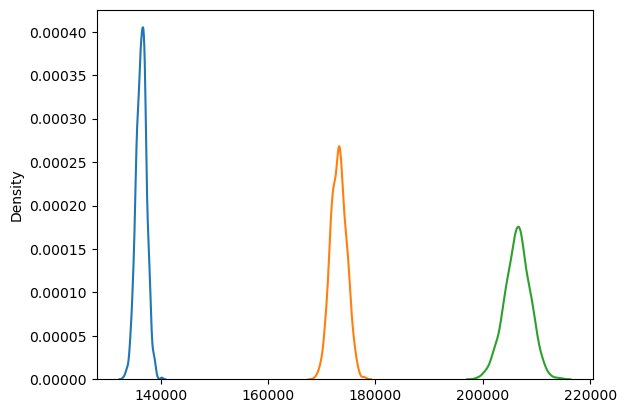

In [29]:
sns.kdeplot(est25)
sns.kdeplot(est50)
sns.kdeplot(est75)

In [59]:
z_grid = np.linspace(np.min(x), np.max(x), 100)

results = []
for s in range(5000):
    df_s = df.sample(frac=1.0,replace=True)
    reg_s = lcls()
    reg_s.fit(x=df_s['area'],y=df_s['price'])
    reg_s.predict(z_grid)
    results.append(reg_s.y_hat_z)

In [60]:
upper_error = []
lower_error = []
for i,z in enumerate(z_grid):
    vals = np.array( [ row[i] for row in results ] )
    upper_error.append(np.quantile(vals,.95))
    lower_error.append(np.quantile(vals,.05))

<Axes: xlabel='area', ylabel='price'>

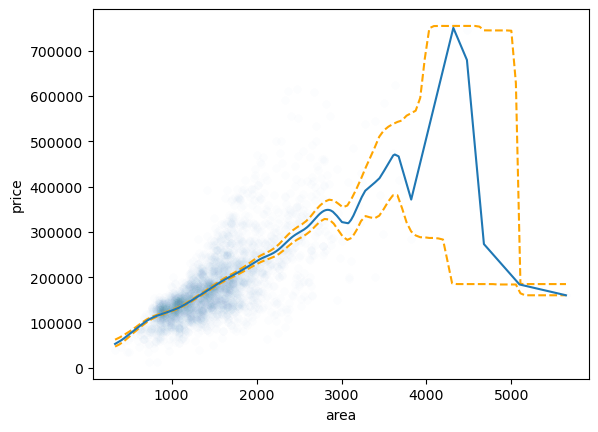

In [67]:
reg = lcls()
reg.fit(x=x,y=y)
reg

sns.lineplot(x=z_grid,y=upper_error,linestyle='--',color='orange')
sns.lineplot(x=z_grid,y=lower_error,linestyle='--',color='orange')
sns.lineplot(x=reg.grid,y=reg.y_hat)
sns.scatterplot(x=x,y=y,alpha=.01)